In [13]:
#Time series ---- forecasting our data
#models : AR,MA,ARIMA,SARIMAX and so on
#WE are going to use one model i.e fbprophet model

Project – Analyzing the trends of COVID-19 with Python Problem Statement: Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends

Guidelines: • Use pandas to accumulate data from multiple data files

• Use plotly (visualization library) to create interactive visualizations

• Use Facebook prophet library to make time series models

• Visualize the prediction by combining these technologies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("covid_19_clean_complete (11) (1).csv")

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
df.shape

(49068, 10)

In [6]:
#Renaming the columns
#Renaming the columns
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered",
                   "WHO Region":"who",
                   "Active":"active"
                   },inplace = True)

  

In [7]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [8]:
df["date"].max()

'2020-07-27'

In [9]:
df["date"].min()

'2020-01-22'

In [10]:
#Records from the last date
df[df["date"] == df["date"].max()]

,state,country,lat,long,date,confirmed,deaths,recovered,active,who
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [11]:
top = df[df["date"] == df["date"].max()]

In [14]:
world = top.groupby("country")["confirmed","active","deaths","recovered"].sum().reset_index()
world.head()

,country,confirmed,active,deaths,recovered
0,Afghanistan,36263,9796,1269,25198
1,Albania,4880,1991,144,2745
2,Algeria,27973,7973,1163,18837
3,Andorra,907,52,52,803
4,Angola,950,667,41,242


In [15]:
import plotly 
import plotly.express as px

In [18]:
#Top countries having highest number of active cases
#choroplreth

figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="active",
                       hover_name="country",range_color=[1,20000],
                       color_continuous_scale="reds",
                       title="Countries with Active Cases")
figure.show()

# The code provided is using Plotly Express (px) to create a choropleth map with world data. 
# The map will display active COVID-19 cases by country, with the color of each country representing the number of active cases. 


# The world variable likely contains the data with information about different countries, including their names, locations, 
# and active COVID-19 cases.

# The locations parameter specifies the column in the world data that contains the country names or codes to be used as
# the locations on the map.

# The locationmode parameter specifies the mode used to identify the locations. In this case, it's set to "country names",
# which means the country names in the locations column of the world data are used.

# The color parameter specifies the column in the world data that contains the data to be used for coloring the map. In this case,
# it's set to "active", which likely represents the number of active COVID-19 cases in each country.

# The hover_name parameter specifies the column in the world data that contains the data to be displayed when hovering over each 
# country on the map. In this case, it's set to "country", which likely represents the country names.

# The range_color parameter specifies the range of values for the colors on the map. In this case, it's set to [1,20000], 
# which means the color scale will range from 1 to 20000, likely representing the range of active COVID-19 cases.

# The color_continuous_scale parameter specifies the color scale to be used for coloring the map. In this case, it's set to 
# "reds", which likely represents a red color scale.

# The title parameter specifies the title of the map. In this case, it's set to "Countries with Active Cases".

# Finally, the figure.show() function is used to display the choropleth map.

In [19]:
#Total confirmed cases in all countries together 
total_cases = df.groupby("date")["date","confirmed"].sum().reset_index()
total_cases.head()

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [20]:
total_cases["date"] = pd.to_datetime(total_cases["date"])
## change the datatype from string to date format

Text(0, 0.5, 'Total cases')

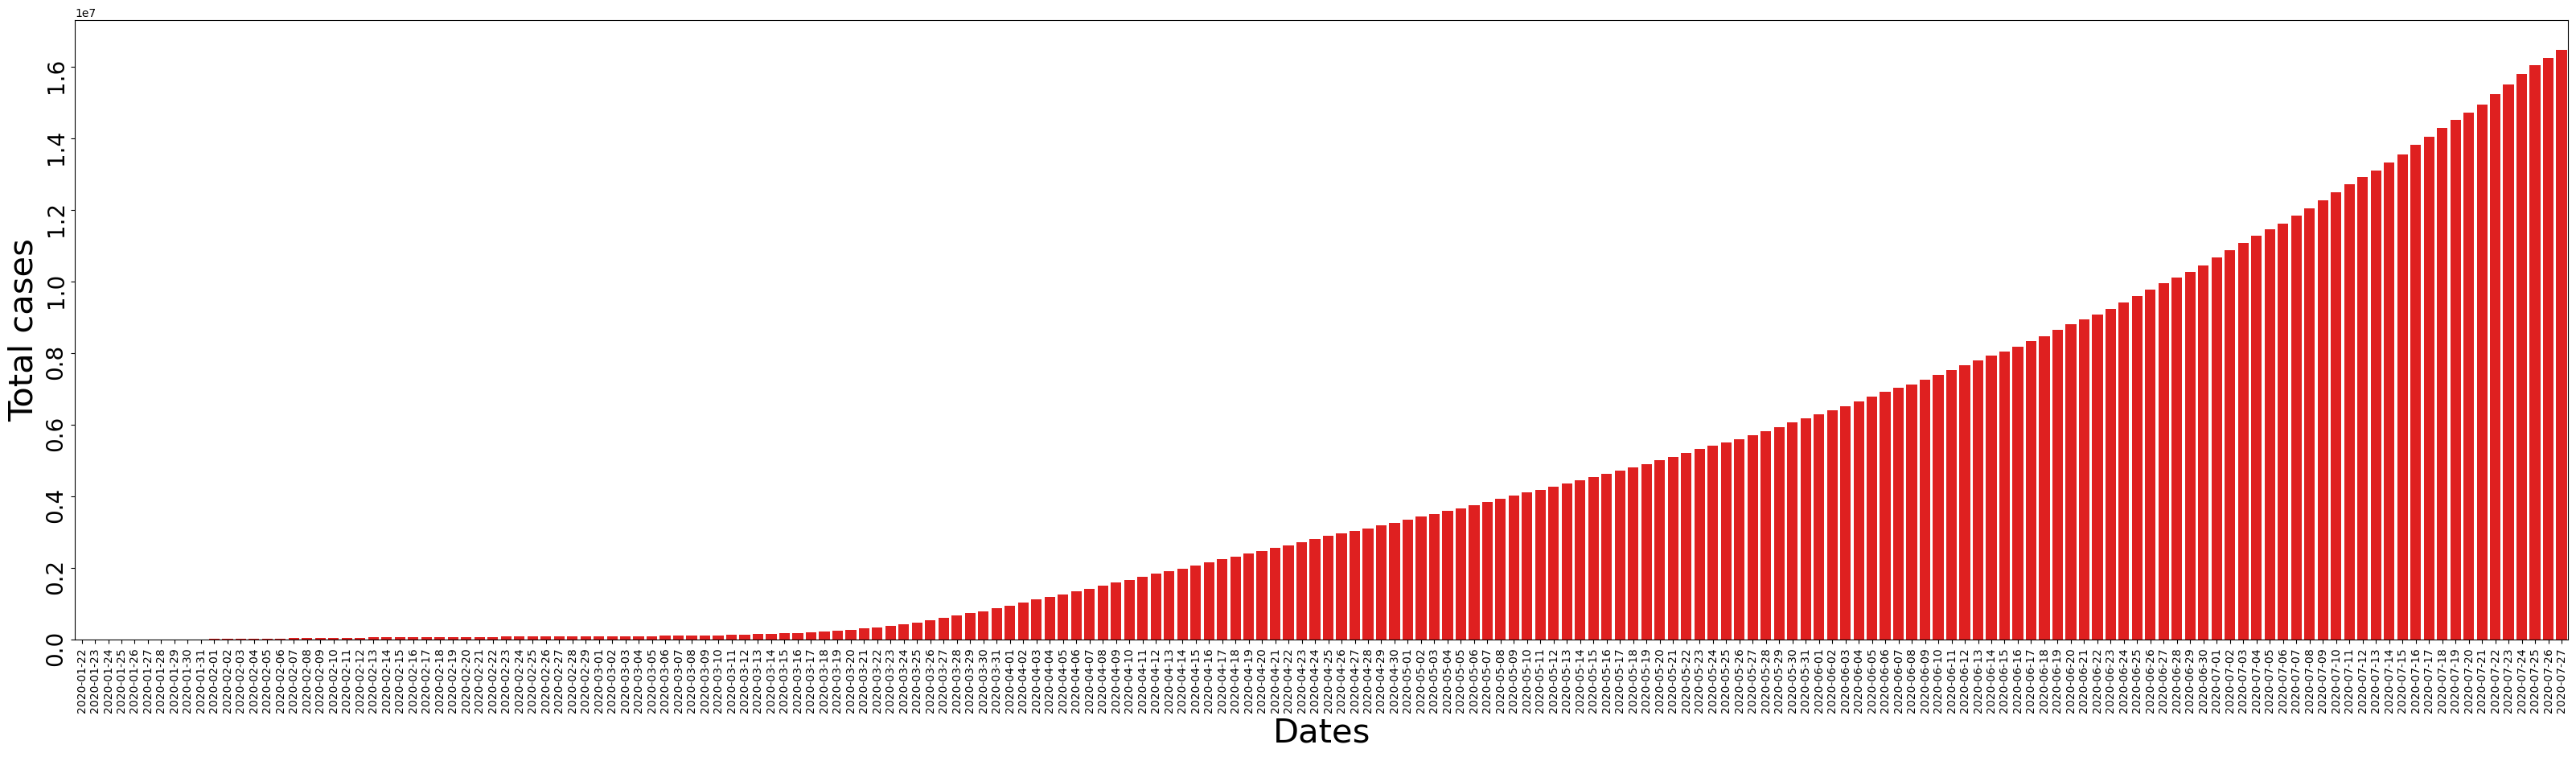

In [24]:
#Trend of covid

plt.figure(figsize = (40,10))
ax = sns.barplot(x = total_cases.date.dt.date,y = total_cases.confirmed, color = "r")
##ax.set(xlabel= "Dates", ylabel = "Total cases")

plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(rotation = 90, fontsize = 20)

plt.xlabel("Dates", fontsize = 30)
plt.ylabel("Total cases", fontsize = 30)

In [25]:
# top 20 countries with highest number of actives cases for the latest data 27th july 2020

top_actives = top.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

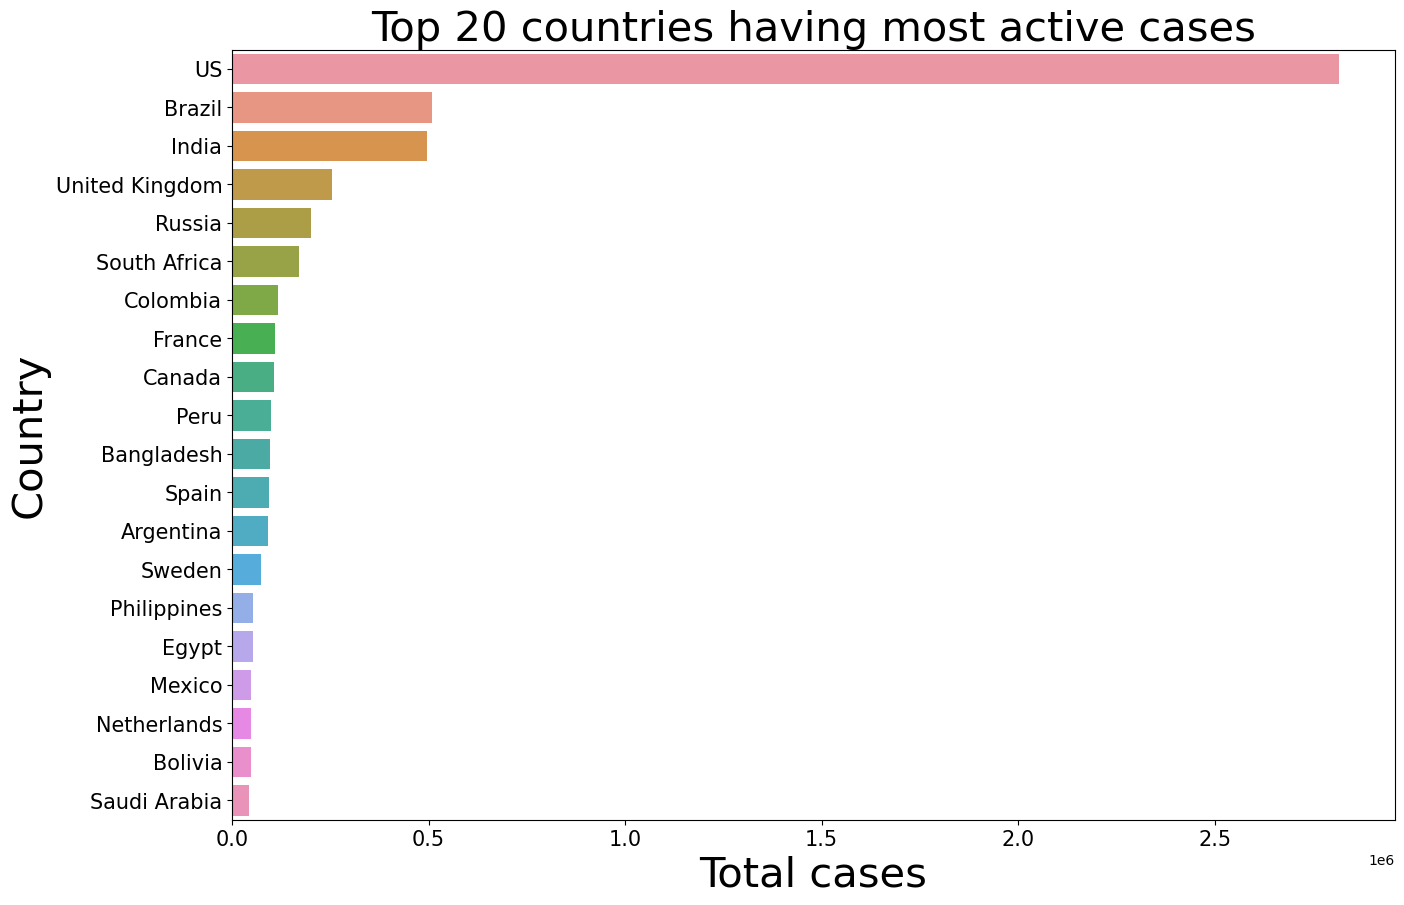

In [41]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)

ax = sns.barplot(x=top_actives.active, y=top_actives.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [42]:
# top 20 countries with highest number of Death cases for the latest data 27th july 2020

top_deaths = top.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()
top_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

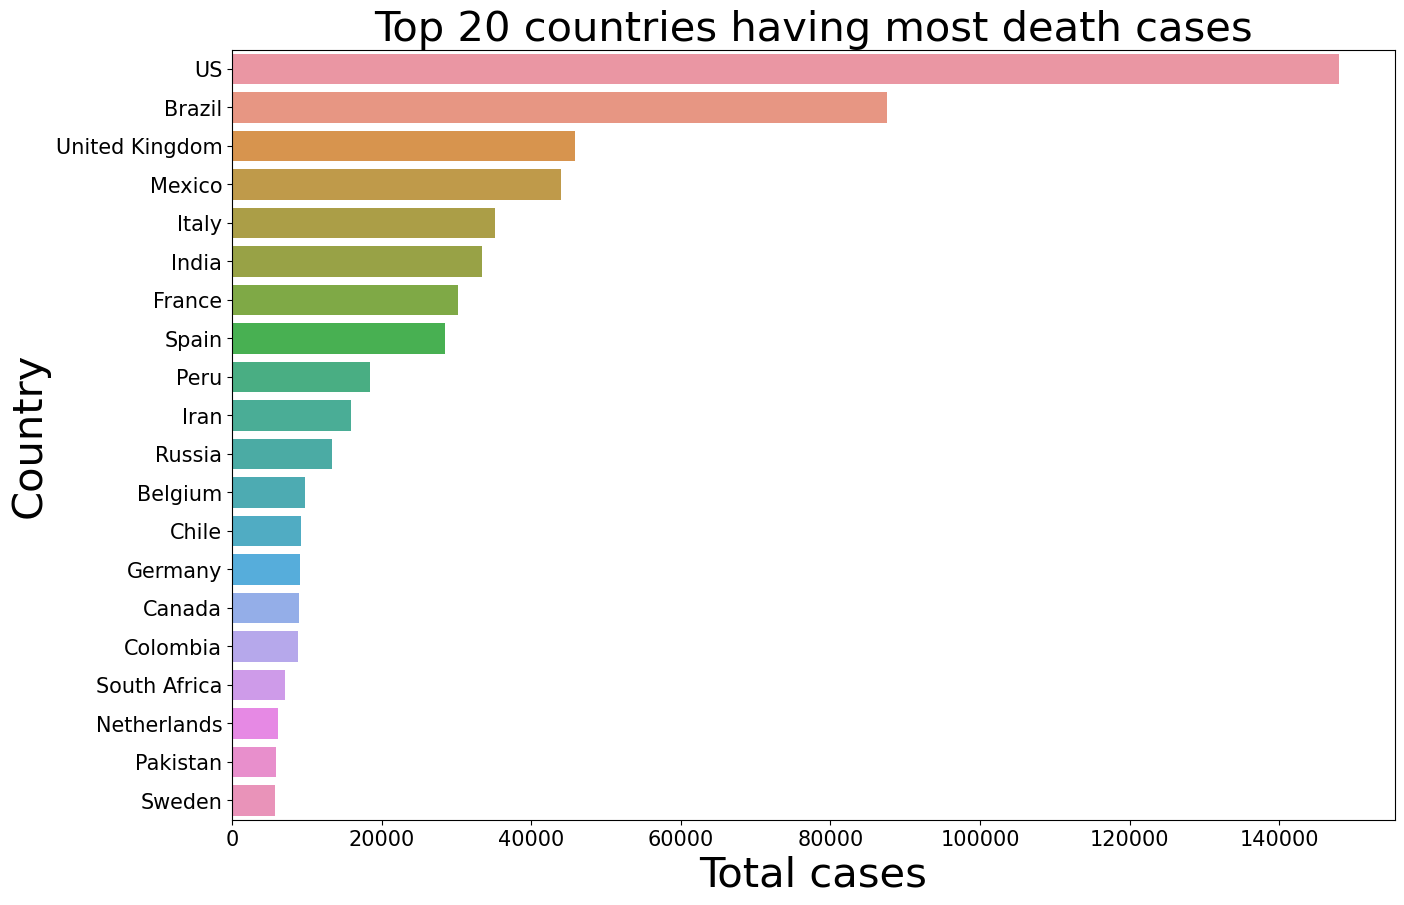

In [43]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most death cases",fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [44]:
# Can also try with Recovered cases
# NUMBER OF PEOPLE RECOVERED
recovery = top.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()
recovery

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

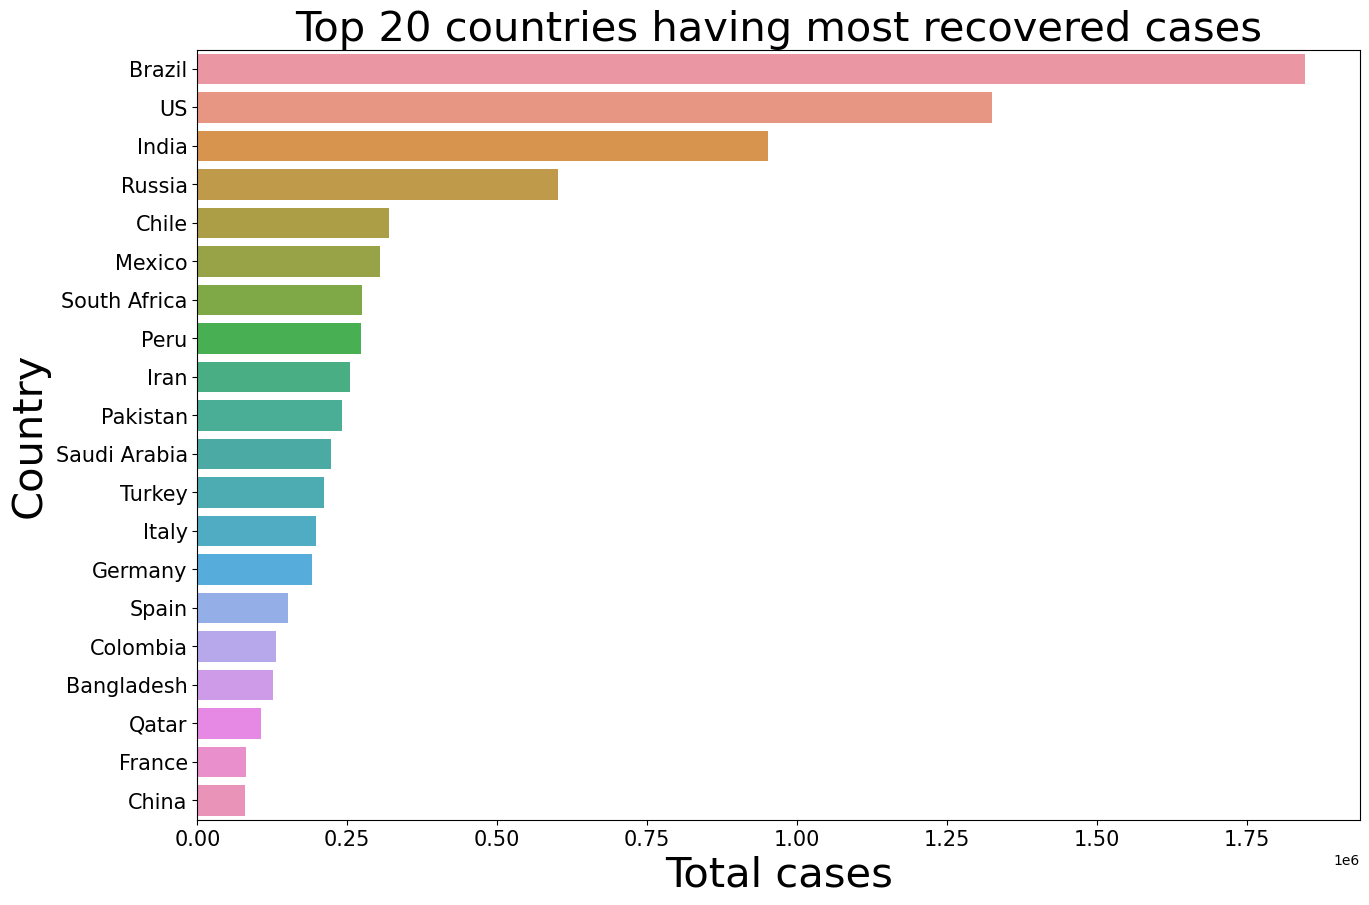

In [45]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most recovered cases",fontsize=30)
ax = sns.barplot(x=recovery.recovered, y=recovery.country)
ax.set(xlabel="Total cases",ylabel="Country")

In [51]:
#US data
us = df[df.country == "US"]
us = us.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
us

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [52]:
# #US data
# us = df[df.country == "US"]
# us = us.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
# us = us.iloc[33:].reset_index().drop("index",axis=1)
# us

In [55]:
#Brazil
brazil = df[df.country == "Brazil"]
brazil = brazil.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
brazil.head(50)

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
5,2020-01-27,0,0,0,0
6,2020-01-28,0,0,0,0
7,2020-01-29,0,0,0,0
8,2020-01-30,0,0,0,0
9,2020-01-31,0,0,0,0


In [56]:
#United kingdom
uk = df[df.country == "United Kingdom"]
uk = uk.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
uk


,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1425,45639,298731,251667
184,2020-07-24,1425,45762,299500,252313
185,2020-07-25,1427,45823,300270,253020
186,2020-07-26,1434,45837,301020,253749


In [57]:
#India

india = df[df.country == "India"]
india= india.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
india= india.iloc[9:].reset_index().drop("index",axis=1)
india

,date,recovered,deaths,confirmed,active
0,2020-01-31,0,0,1,1
1,2020-02-01,0,0,1,1
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,3,3
4,2020-02-04,0,0,3,3
...,...,...,...,...,...
174,2020-07-23,817209,30601,1288108,440298
175,2020-07-24,849432,31358,1337024,456234
176,2020-07-25,885573,32060,1385635,468002
177,2020-07-26,917568,32771,1435616,485277


In [31]:
count=df["country"].unique()
len(count)
count

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [61]:
#China

China = df[df.country == "China"]
China= india.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
China

,date,recovered,deaths,confirmed,active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970
...,...,...,...,...,...
183,2020-07-23,78701,4649,86045,2695
184,2020-07-24,78745,4650,86202,2807
185,2020-07-25,78813,4652,86381,2916
186,2020-07-26,78862,4652,86570,3056


In [62]:
#Russia

Russia=df[df.country=='Russia']
Russia=Russia.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
Russia=Russia.iloc[10:].reset_index().drop('index',axis=1)
Russia

,date,recovered,deaths,confirmed,active
0,2020-02-01,0,0,2,2
1,2020-02-02,0,0,2,2
2,2020-02-03,0,0,2,2
3,2020-02-04,0,0,2,2
4,2020-02-05,0,0,2,2
...,...,...,...,...,...
173,2020-07-23,579295,12873,793720,201552
174,2020-07-24,587728,13026,799499,198745
175,2020-07-25,596064,13172,805332,196096
176,2020-07-26,599172,13249,811073,198652


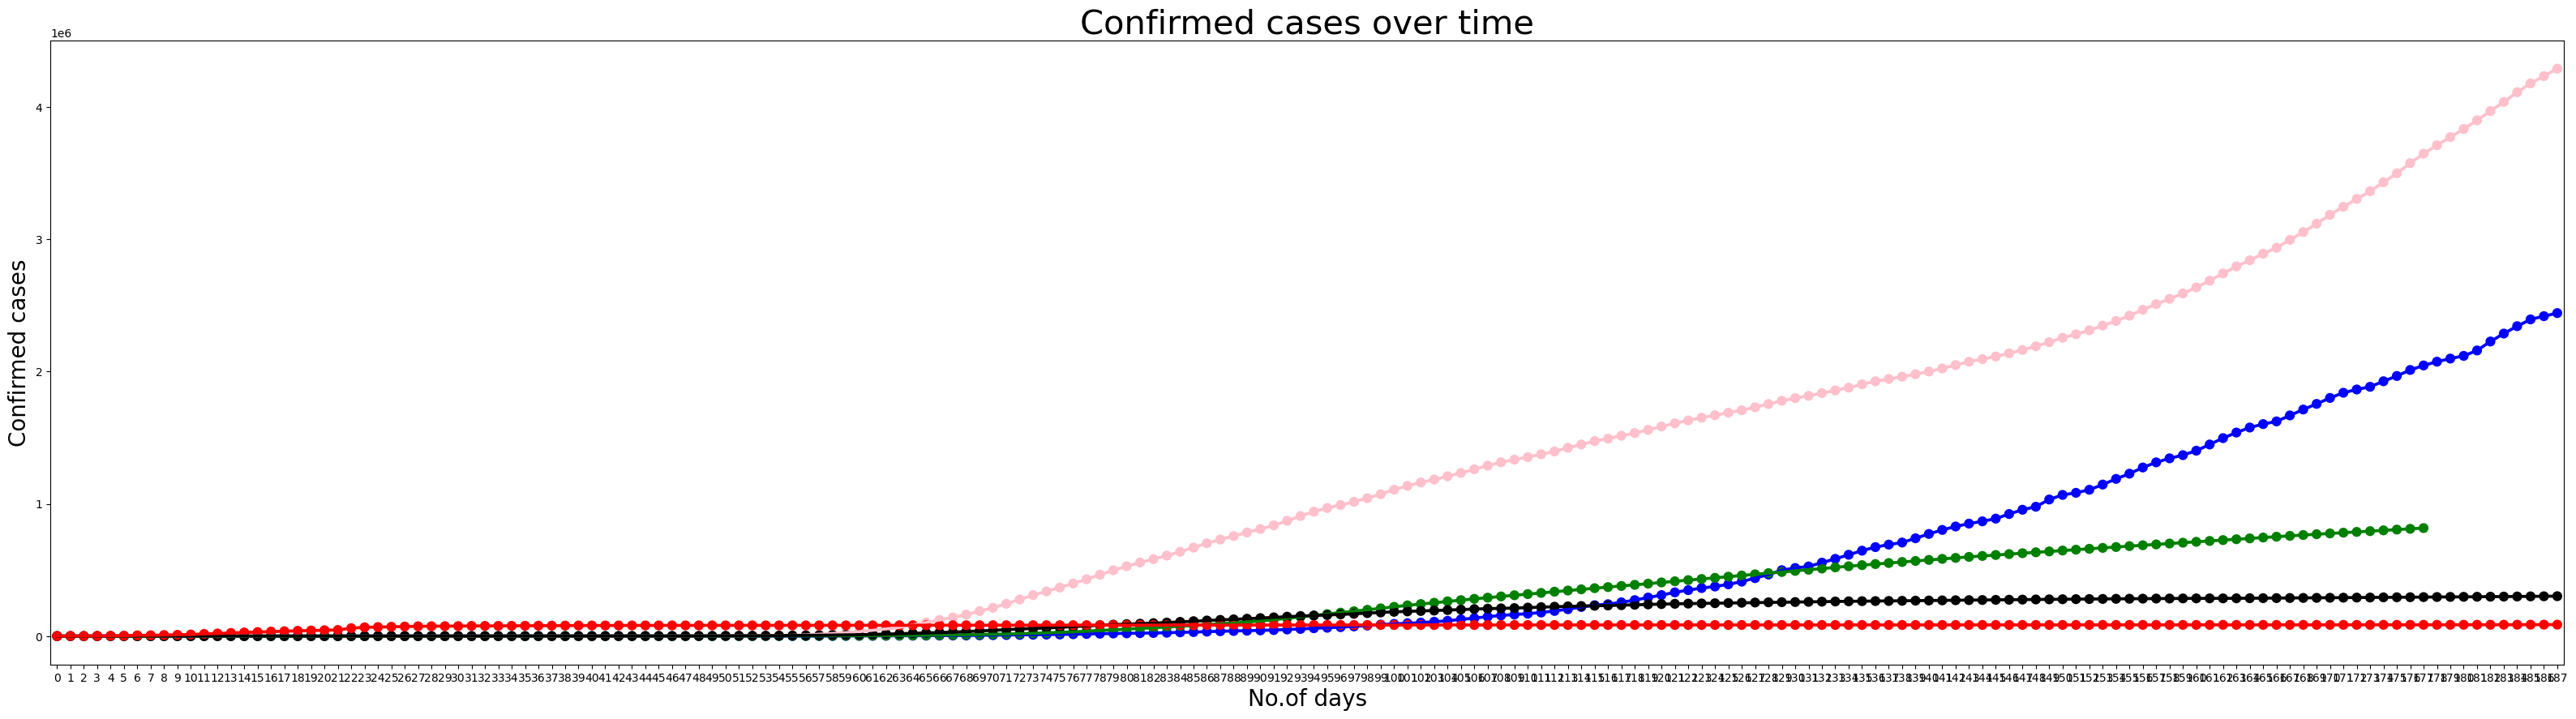

In [63]:
# confirmed cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(brazil.index,brazil.confirmed,color="Blue")
sns.pointplot(us.index,us.confirmed,color="Pink")
sns.pointplot(Russia.index,Russia.confirmed,color="Green")
sns.pointplot(uk.index,uk.confirmed,color="black")
sns.pointplot(india.index,india.confirmed,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

# US is having highest numbers of confirmed cases
# the rate of increase of cases is highest in case of US

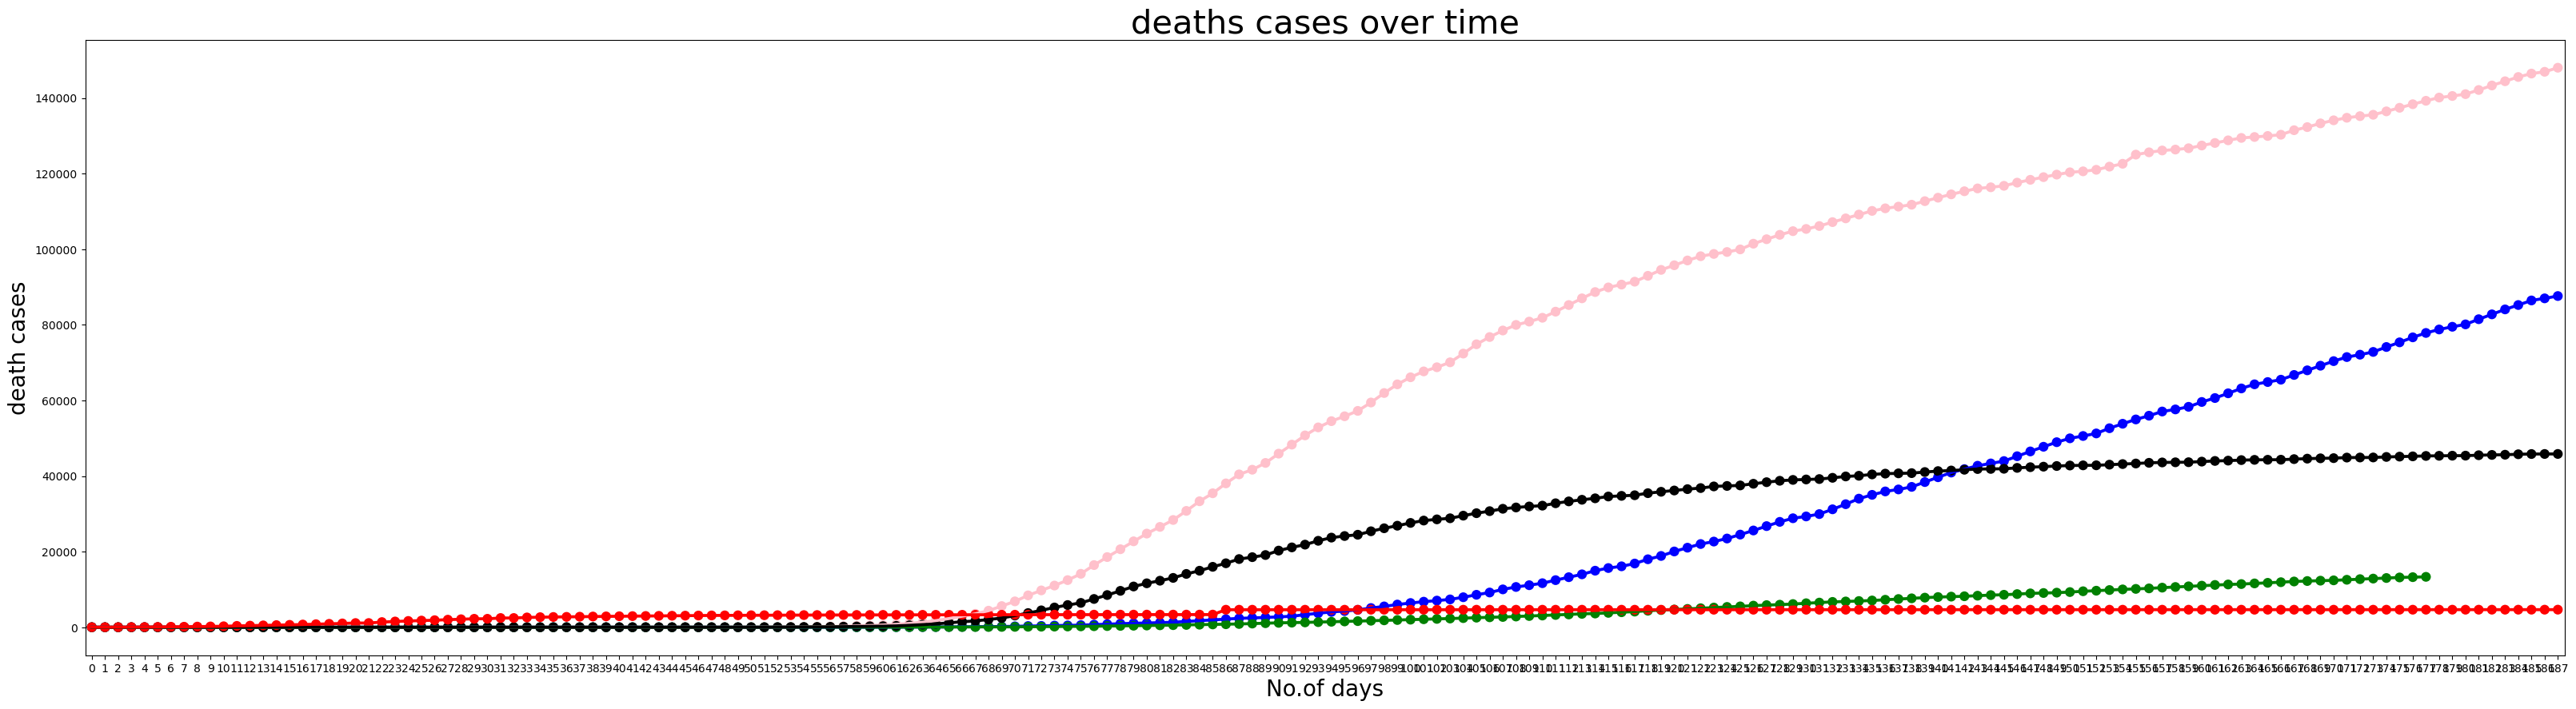

In [64]:
# Death cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(brazil.index,brazil.deaths,color="Blue")
sns.pointplot(us.index,us.deaths,color="Pink")
sns.pointplot(Russia.index,Russia.deaths,color="Green")
sns.pointplot(uk.index,uk.deaths,color="black")
sns.pointplot(india.index,india.deaths,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('death cases',fontsize=20)
plt.title('deaths cases over time',fontsize=30)
plt.show()

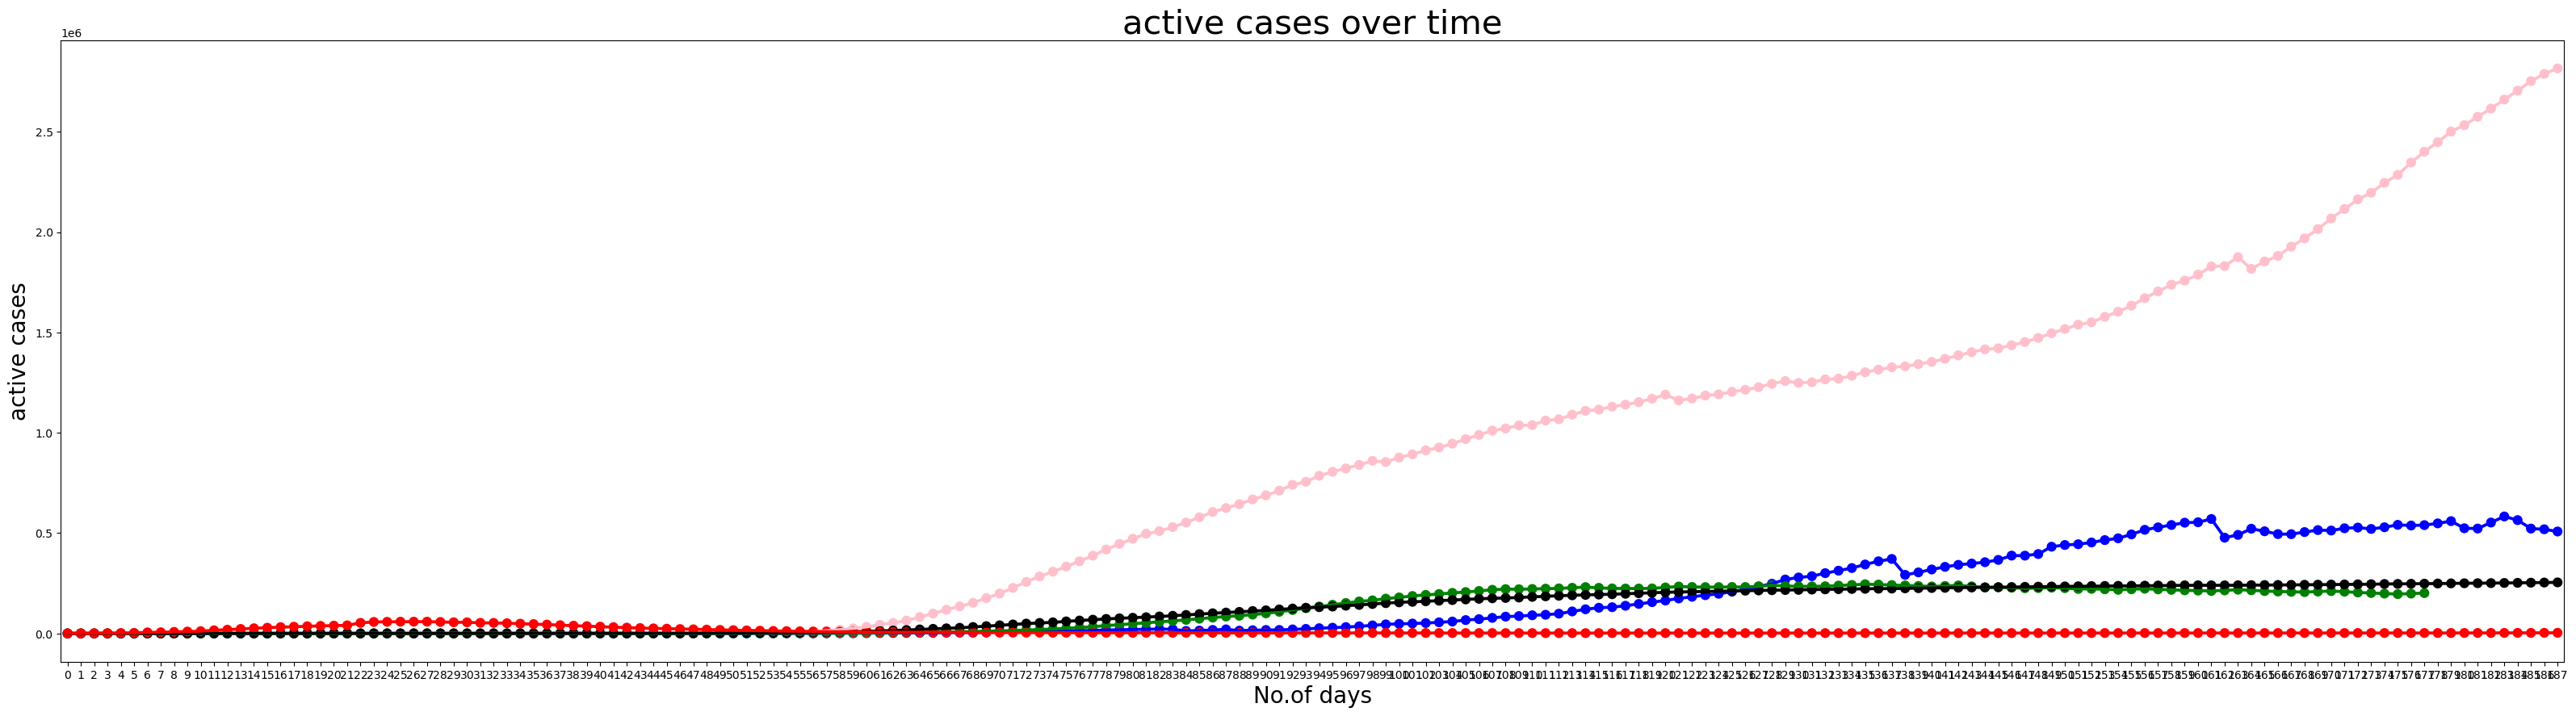

In [65]:
# active cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(brazil.index,brazil.active,color="Blue")
sns.pointplot(us.index,us.active,color="Pink")
sns.pointplot(Russia.index,Russia.active,color="Green")
sns.pointplot(uk.index,uk.active,color="black")
sns.pointplot(india.index,india.active,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('active cases',fontsize=20)
plt.title('active cases over time',fontsize=30)
plt.show()

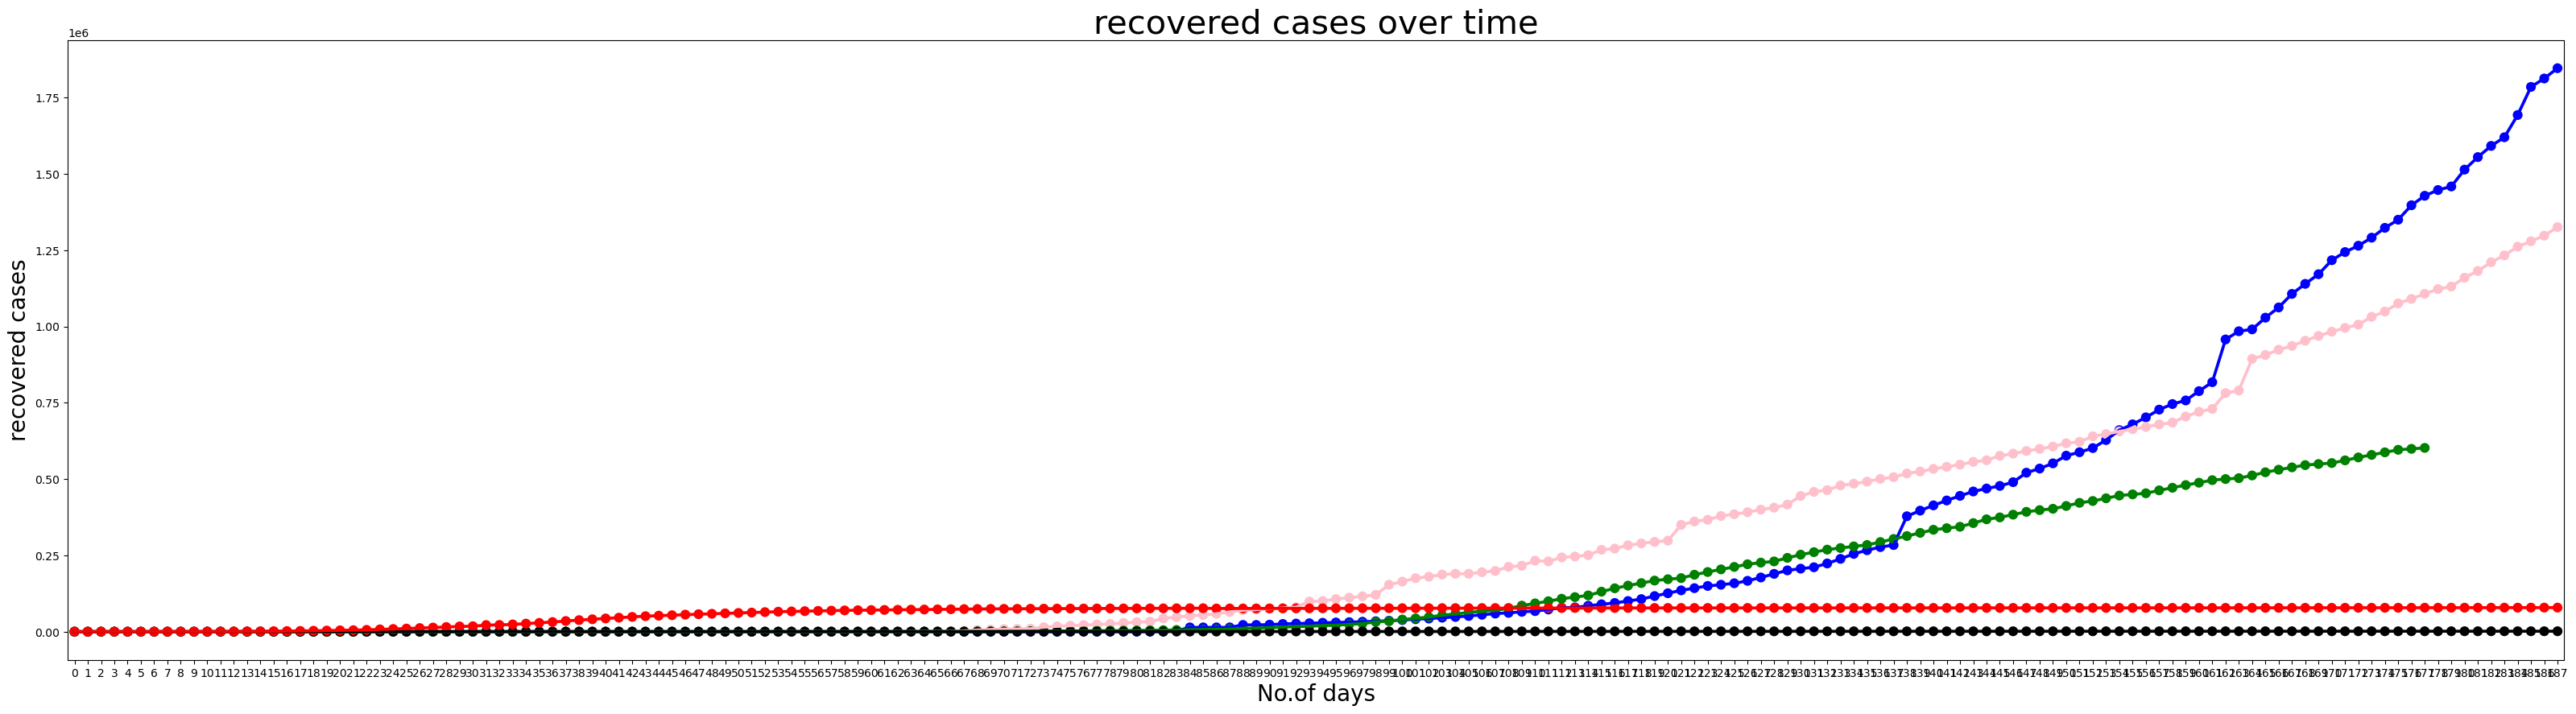

In [66]:
# recovered cases trend in top 5 countries
plt.figure(figsize=(40,10))
sns.pointplot(brazil.index,brazil.recovered,color="Blue")
sns.pointplot(us.index,us.recovered,color="Pink")
sns.pointplot(Russia.index,Russia.recovered,color="Green")
sns.pointplot(uk.index,uk.recovered,color="black")
sns.pointplot(india.index,india.recovered,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('recovered cases',fontsize=20)
plt.title('recovered cases over time',fontsize=30)
plt.show()

# MOdel building using Facebook Prophet library

In [39]:
pip install prophet
## pip---package installer for python

SyntaxError: invalid syntax (106166372.py, line 1)

In [40]:
from prophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [34]:
data=pd.read_csv("covid_19_clean_complete (11).csv",parse_dates=["Date"])
data

FileNotFoundError: [Errno 2] No such file or directory: 'covid_19_clean_complete (11).csv'

In [70]:
#To check how many total active cases are there
data["Active"].sum()

396715350

In [33]:
confirmed = data.groupby("Date").sum().["Confirmed"].reset_index()
confirmed

NameError: name 'data' is not defined

In [75]:
deaths = data.groupby("Date").sum()["Deaths"].reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [77]:
recovered = data.groupby("Date").sum()["Recovered"].reset_index()
recovered 

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [78]:
#For buildign a forecasting model using fbprophet library
#there should be only 2 columns passed
#the column names should always be ---> 'ds','y'

confirmed.columns = ["ds", "y"]  #ds ---> date stamp, y ----> target
confirmed["ds"] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [79]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(deaths['ds'])
deaths.tail()

,ds,y
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621
187,2020-07-27,654036


In [80]:
recovered.columns=['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])
recovered.tail()

,ds,y
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464
187,2020-07-27,9468087


# Making forecasting of confirmed cases

In [81]:
#Eg: import sklear-----
# ld = LinearRegression()

m = Prophet()
m.fit(confirmed)

22:15:22 - cmdstanpy - INFO - Chain [1] start processing
22:15:23 - cmdstanpy - INFO - Chain [1] done processing


In [82]:
future = m.make_future_dataframe(periods = 7) #this will forecast the data for next 7 days

In [83]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [84]:
future.tail(7)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [89]:
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674387e+07,1.664395e+07,1.685857e+07
191,2020-07-31,1.695904e+07,1.684685e+07,1.706477e+07
192,2020-08-01,1.716673e+07,1.705707e+07,1.727310e+07
193,2020-08-02,1.736428e+07,1.725054e+07,1.747141e+07
194,2020-08-03,1.755891e+07,1.744177e+07,1.768341e+07


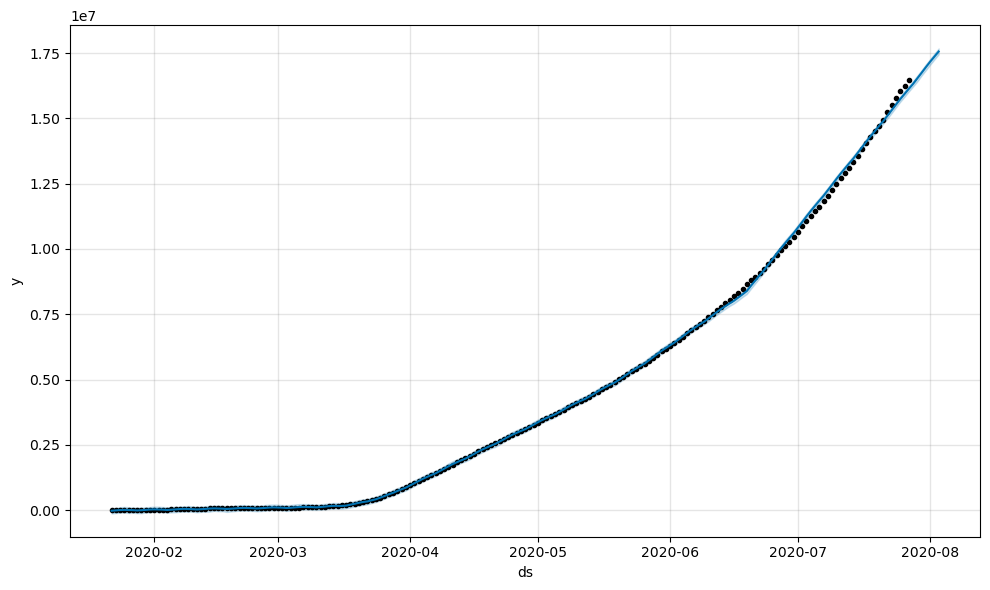

In [86]:
confirmed_forecasting_plot=m.plot(forecast)

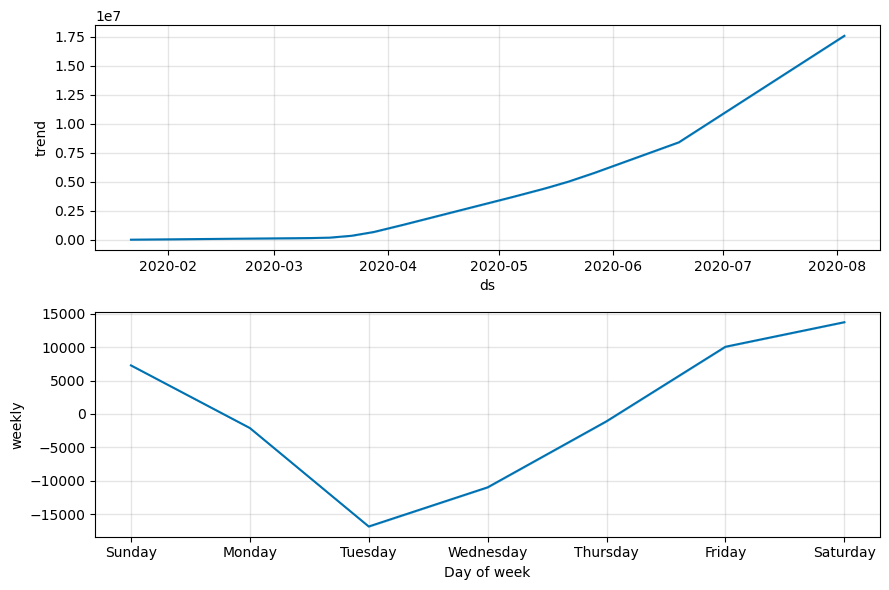

In [87]:
confirmed_forecasting_plot1=m.plot_components(forecast)